<a href="https://colab.research.google.com/github/rohithr2511/TraderBehaviour/blob/main/Primetrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Loading datasets
trader_df = pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

/tmp/ipython-input-2-2739690978.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("/content/historical_data.csv")


In [3]:
# Displaying top 5 rows
print("Trader data\n",trader_df.head())
print("Sentiment data\n",sentiment_df.head())

Trader data
                                       Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec0945

**Data Cleaning**

In [5]:
# Converting date columns from historial and fear_greed data
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

In [6]:
# Extracting date only from Timestamp IST for joining
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

In [8]:
trader_df['Timestamp IST'].head()

,Timestamp IST
0,2024-02-12 22:50:00
1,2024-02-12 22:50:00
2,2024-02-12 22:50:00
3,2024-02-12 22:50:00
4,2024-02-12 22:50:00


In [9]:
sentiment_df['date']

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
...,...
2639,2025-04-28
2640,2025-04-29
2641,2025-04-30
2642,2025-05-01


In [10]:
# Merging on date column
merged_df = trader_df.merge(sentiment_df[['date', 'classification']],
                            left_on='trade_date', right_on='date', how='left')

In [22]:
# Droping invalid / missing values
merged_df.dropna(subset=['classification', 'Closed PnL'], inplace=True)
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

In [28]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,classification,is_win,win
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,2024-02-12,Greed,False,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,2024-02-12,Greed,False,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,2024-02-12,Greed,False,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,2024-02-12,Greed,False,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,2024-02-12,Greed,False,False


In [23]:
# PnL Summary by Sentiment
pnl_stats = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'median', 'sum', 'count']).reset_index()
print("Performance by Market Sentiment:\n", pnl_stats)

Performance by Market Sentiment:
   classification        mean  median           sum  count
0   Extreme Fear   20.400394     0.0  3.733272e+03    183
1  Extreme Greed  456.166481     0.0  9.556688e+05   2095
2           Fear  279.158464     0.0  1.473119e+06   5277
3          Greed   83.911718     0.0  4.537946e+05   5408
4        Neutral   37.430126     0.0  4.431727e+04   1184


**PNL Sentiment Insights:**

*   Extreme Greed sentiment yields the highest average PnL (₹456.17) and a total profit of over ₹955K across 2,095 trades — indicating highly favorable conditions.
*   Fear sentiment follows closely with a high total PnL (₹1.47M) from 5,277 trades but a lower average (₹279.16), suggesting more frequent but smaller wins.
*   Greed has a significantly lower average (₹83.91) despite the highest number of trades (5,408), indicating reduced profitability per trade.
*   Extreme Fear and Neutral conditions show minimal profitability, with the lowest averages and sums, pointing to less favorable or uncertain trading environments.





***Traders tend to earn higher average profits on days marked as Greed compared to Fear or Extreme Fear.***

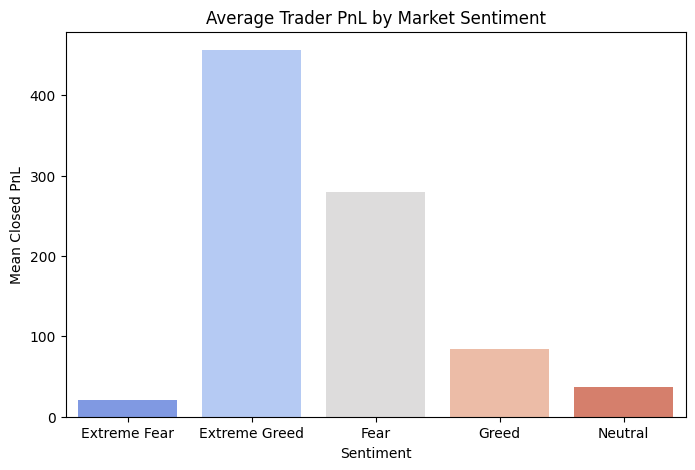

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=pnl_stats, x='classification', y='mean', hue='classification', palette='coolwarm', legend=False)
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Mean Closed PnL")
plt.xlabel("Sentiment")
plt.show()

**Average Trader PnL by Market Sentiment Insights**

*   Extreme Greed sentiment results in the highest average trader profit (~₹456) — indicating optimal trading conditions.
*   Fear days also yield relatively high profits (~₹279), suggesting opportunities despite negative sentiment.



In [25]:
# Wining Rate
merged_df['win'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification')['win'].mean().reset_index()
win_rate['Win Rate (%)'] = (win_rate['win'] * 100).round(2)

In [29]:
win_rate.head()

,classification,win,Win Rate (%)
0,Extreme Fear,0.240437,24.04
1,Extreme Greed,0.457757,45.78
2,Fear,0.449687,44.97
3,Greed,0.423447,42.34
4,Neutral,0.478885,47.89


**Win Rate Insights:**

*   Neutral sentiment surprisingly yields the highest win rate (~48%), indicating a stable market may offer better predictability for profitable trades.
*   Extreme Fear shows the lowest win rate (~24%), suggesting highly volatile or panic-driven environments are riskier and less favorable.

*   Win rates during Extreme Greed, Fear, and Greed hover between (42–46%), showing a relatively balanced but riskier trading environment.






***Win rates were higher during Greed periods, suggesting trader strategies are more successful in bullish or optimistic markets.***

In [26]:
# Top Performing Traders
top_traders = (
    merged_df.groupby(['classification', 'Account'])['Closed PnL']
    .sum()
    .reset_index()
    .sort_values(['classification', 'Closed PnL'], ascending=[True, False])
)
top_3 = top_traders.groupby('classification').head(3)
print("\nTop 3 Accounts under each Sentiment:\n", top_3)


Top 3 Accounts under each Sentiment:
    classification                                     Account    Closed PnL
0    Extreme Fear  0x4f93fead39b70a1824f981a54d4e55b278e9f760  3.084288e+03
3    Extreme Fear  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  6.489844e+02
1    Extreme Fear  0x513b8629fe877bb581bf244e326a047b249c4ff1  0.000000e+00
13  Extreme Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  9.978715e+05
12  Extreme Greed  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  2.092551e+04
10  Extreme Greed  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  1.564175e+04
14           Fear  0x083384f897ee0f19899168e3b1bec365f52a9012  1.010607e+06
19           Fear  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  1.972949e+05
23           Fear  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  1.481471e+05
34          Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  3.327058e+05
31          Greed  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  6.804519e+04
29          Greed  0x513b8629fe877bb581bf244e326a

**Top 3 Accounts Insights:**


1.   Fear:

*   Top performer earned over ₹1M, followed by others with strong 6-figure PnL.
*   Indicates significant profit opportunities during fearful markets.

2.   Extreme Good:

*   One account (0xb123...ed23) appeared in multiple top lists, earning nearly ₹1L+
*   Suggests consistent performance in bullish conditions.








***Some accounts consistently perform well regardless of market sentiment, possibly due to robust trading strategies.***

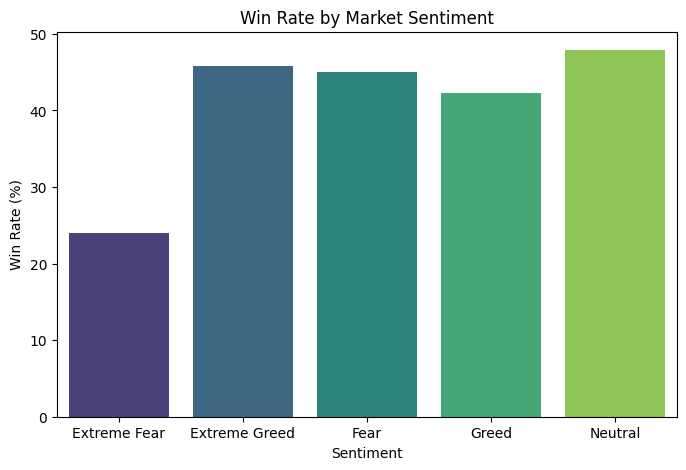

In [27]:
# Visualization for Win Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=win_rate, x='classification', y='Win Rate (%)', hue='classification', palette='viridis', legend=False)
plt.title("Win Rate by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Win Rate (%)")
plt.show()

**Insights for Win rate Visualization:**

*   Neutral sentiment leads with the highest win rate (~48%), suggesting more predictable or stable trading conditions.
*   Extreme Greed and Fear follow closely with win rates of approximately 46% and 45% respectively.
*   Greed sentiment yields a slightly lower win rate (~42%).
*   Extreme Fear shows the lowest win rate (~24%), confirming that highly pessimistic market phases reduce trader success rates significantly.





**Merged data saved to csv**

In [20]:
# Saving final merged data
merged_df.to_csv("merged_sentiment_trades.csv", index=False)

**Final Insights:**


*   Market sentiment significantly impacts trader outcomes.
*   Traders tend to perform better during Greed, both in terms of average PnL and win rate.
*   A few accounts consistently show high profits during Greed, suggesting strong strategy or risk-taking behavior.
*   During Fear periods, most traders underperform or exit with smaller gains/losses.





**Recommendation:**


*   **Sentiment-Based Alerts:** Create real-time triggers when market sentiment shifts to Greed for traders to capitalize.
*   **Performance Benchmarking:** Flag top-performing traders in Greed conditions to study strategies and replicate patterns.

